![](https://www.tennisworldusa.org/imgb/63284/atp-opens-the-bid-for-the-new-atp-finals-location-after-2020.jpg)

In [1]:
#General 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df=pd.read_csv('tennis_stats.csv')
print(df.shape)
df.head()

(1721, 24)


,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


 #### Outcome set : <font color='red'>**Aces**</font>
 
 #### Input : rest

#### Data Pre-Processing

In [2]:
# Checking for null values, if any 
print(df.isnull().sum().sum())

#Since no null values, I will just move on to the next thing

0


#### Data Exploration 

In [3]:
corelation=df.corr().reset_index()
corelation['Aces']=corelation['Aces']*100
x_tik=corelation.index
corelation

,index,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Year,1.000000,0.051406,-0.016728,-0.106784,0.005300,-0.039087,-10.836701,-0.072404,-0.101735,...,-0.073256,-0.078229,-0.108477,-0.008930,-0.041790,-0.005544,-0.108235,-0.077181,0.043908,-0.040483
1,FirstServe,0.051406,1.000000,-0.070659,0.025488,0.101417,-0.001924,4.814897,-0.018877,0.057709,...,-0.010676,0.004189,0.071920,0.137473,0.148349,0.180996,0.064832,0.053736,0.057882,-0.068759
2,FirstServePointsWon,-0.016728,-0.070659,1.000000,0.021729,0.320765,-0.004724,46.032318,-0.041538,0.301925,...,-0.010193,-0.002793,0.376460,0.817829,0.648753,0.860033,0.356702,0.330581,0.361121,-0.150004
3,FirstServeReturnPointsWon,-0.106784,0.025488,0.021729,1.000000,0.072707,0.301265,14.016463,0.324057,0.295724,...,0.757435,0.834267,0.261206,0.091319,0.496682,0.052335,0.256029,0.243278,0.240808,-0.178664
4,SecondServePointsWon,0.005300,0.101417,0.320765,0.072707,1.000000,0.103584,26.626853,0.052755,0.258691,...,0.096622,0.095585,0.296809,0.650764,0.622673,0.713076,0.268979,0.250918,0.281215,-0.181013
5,SecondServeReturnPointsWon,-0.039087,-0.001924,-0.004724,0.301265,0.103584,1.000000,9.549374,0.264413,0.234212,...,0.603755,0.727338,0.209521,0.096553,0.408975,0.055004,0.193093,0.185217,0.199401,-0.159592
6,Aces,-0.108367,0.048149,0.460323,0.140165,0.266269,0.095494,100.000000,0.037188,0.757405,...,0.139987,0.138023,0.866138,0.440922,0.428679,0.472101,0.825301,0.768628,0.798404,-0.277811
7,BreakPointsConverted,-0.072404,-0.018877,-0.041538,0.324057,0.052755,0.264413,3.718766,1.000000,0.096368,...,0.561759,0.387170,0.083182,-0.025670,0.255050,-0.007254,0.076989,0.062297,0.075022,-0.051005
8,BreakPointsFaced,-0.101735,0.057709,0.301925,0.295724,0.258691,0.234212,75.740485,0.096368,1.000000,...,0.335205,0.331043,0.971296,0.354012,0.463110,0.354005,0.883470,0.943309,0.876036,-0.322082
9,BreakPointsOpportunities,-0.114806,0.062345,0.324853,0.313338,0.277782,0.249583,78.493373,0.086502,0.973352,...,0.358483,0.352783,0.978278,0.372271,0.491198,0.380716,0.923453,0.909295,0.900444,-0.334548


<font color='blue'>*Plotting the correlation values for outcome sets*</font>

mean : 43.683833926871195
std : 36.93233049654553
56.52173913043478 %


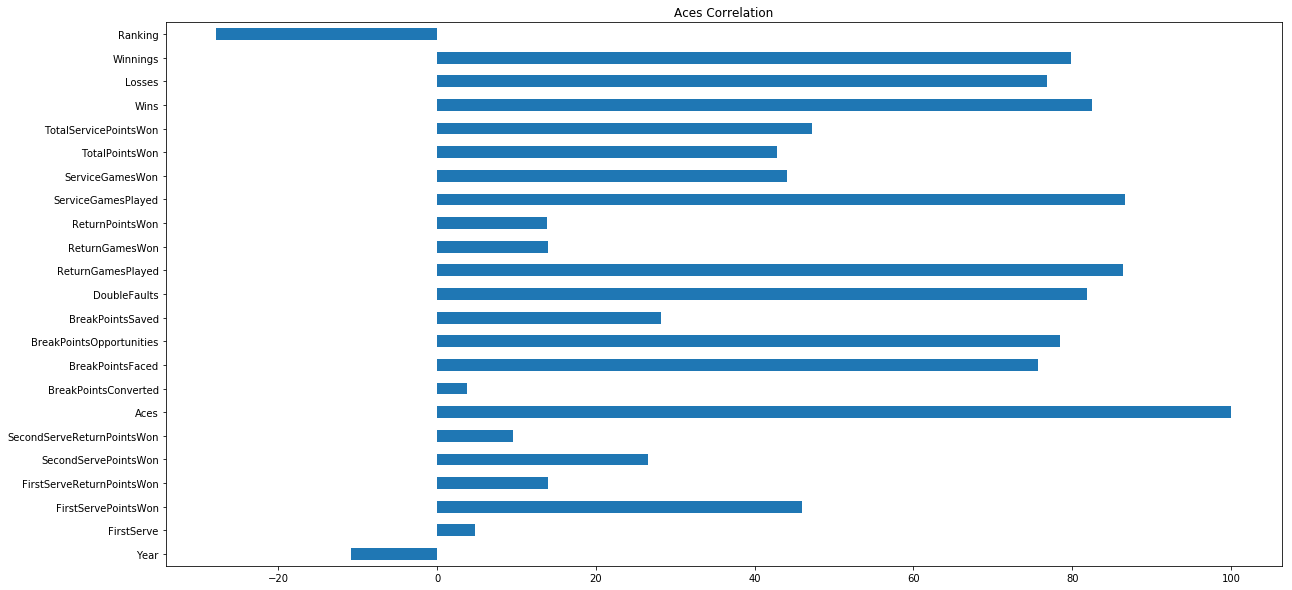

In [4]:
#Aces
#corelation['Aces'].plot.barh(figsize=(10,5),color='red',title='Aces Correlation')

ax = corelation.Aces.plot.barh(figsize=(20,10),title='Aces Correlation')
ax.set_yticks(x_tik)
ax.set_yticklabels(corelation['index'], rotation=0) #Rotation rotates the labels, use 90 when on xticklabels
print('mean :',corelation['Aces'].mean())
print('std :',corelation['Aces'].std())
print((((corelation['Aces']>40).sum())/23)*100,'%')

Taking all the features with above 0.4 correlation with Aces as the input 

#### X, Y, x_train, y_train, x_test, y_test formation

In [5]:
#Select the index entries for which Aces has >40 Correlations
selected_columns=corelation['index'][(corelation['Aces']>40) & (corelation['Aces']!=100)]
# Convert the Pandas Series to list
selected_columns=selected_columns.tolist()

#selecting the columns in selected_columns from df
X=df[selected_columns]
# Aces columns of df, our dependent variable
Y=df[['Aces']]

x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=6)

#### Model and Fitting

In [6]:
# Creating the model object ( I Normalized the data first)
mlr=LinearRegression(normalize=True)

#fitting the model with train data
mlr.fit(x_train,y_train)

#Displaying the coefficients(of first 5 in selected_columns)
coef=mlr.coef_.T
coef_dat=pd.DataFrame(coef,index=selected_columns,columns=['Coefficients'])
coef_dat.head()

,Coefficients
FirstServePointsWon,151.446532
BreakPointsFaced,-1.209863
BreakPointsOpportunities,-1.096941
DoubleFaults,0.556621
ReturnGamesPlayed,0.332577


#### $R^{2}$ Values of Train and Test

In [7]:
print('train R\u00b2 value:',mlr.score(x_train,y_train))
print('test R\u00b2 value:',mlr.score(x_test,y_test))

# Well, That was impressive !!

train R² value: 0.9117507468052701
test R² value: 0.9170979636312054


#### Test set 

In [8]:
# Predicted value for the test set
y_pred=mlr.predict(x_test)

y_test_list=y_test['Aces'].values.tolist()
#y_predicted_list=y_predicted.tolist()
l,j=y_pred.shape
pred=[]
for h in range(l):
    pred.append(y_pred[h][0])
display_comp = pd.DataFrame(list(zip(y_test_list, pred)),columns=['y_test','y_predicted'])
display_comp.head()

,y_test,y_predicted
0,1,-19.470401
1,384,343.613202
2,110,170.933267
3,164,170.306367
4,178,249.047648


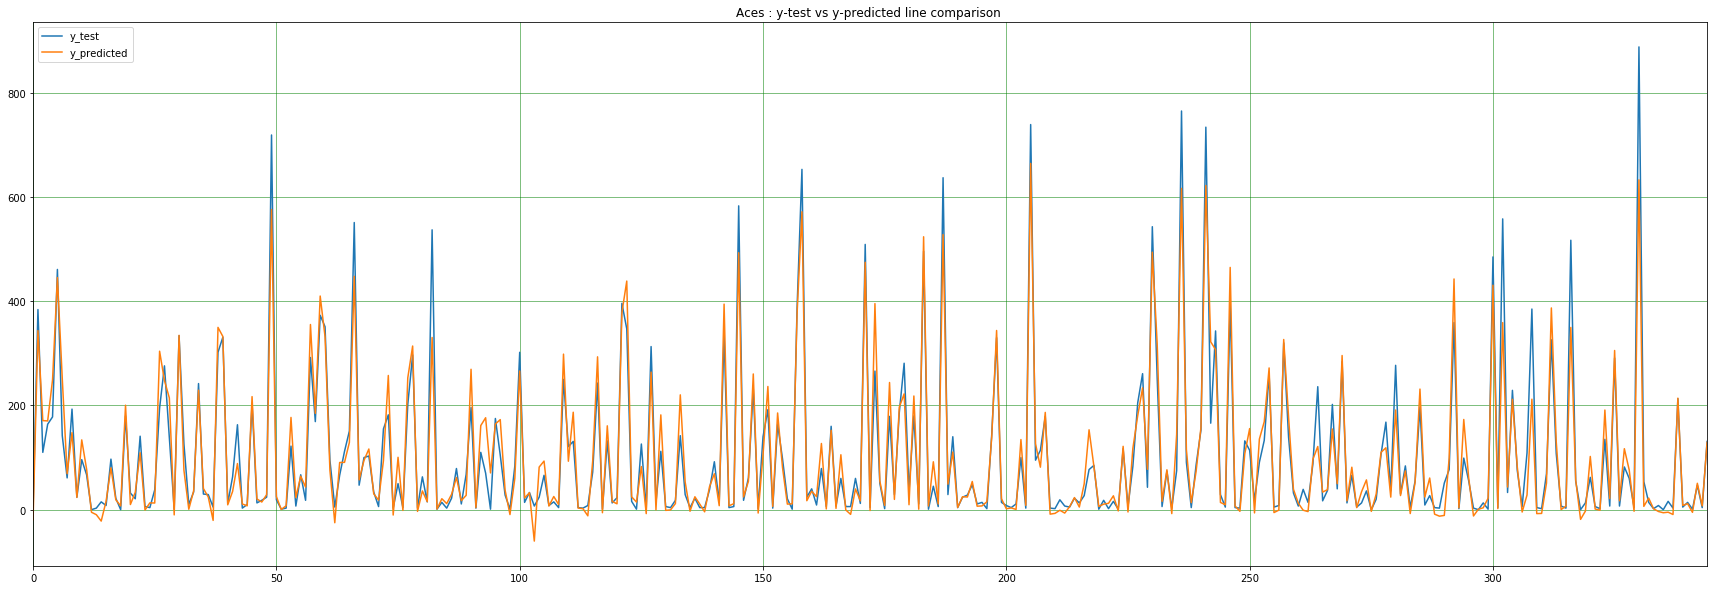

In [9]:
display_comp.plot(kind='line',figsize=(30,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Aces : y-test vs y-predicted line comparison ')
plt.show()

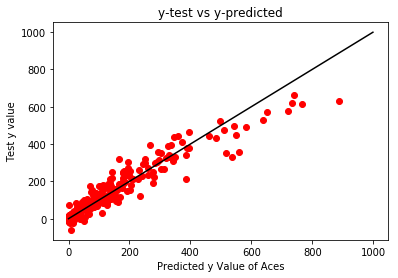

In [10]:
plt.scatter(y_test,y_pred,color='red')
plt.plot(range(1000),range(1000),color='black')
plt.xlabel('Predicted y Value of Aces')
plt.ylabel('Test y value')
plt.title('y-test vs y-predicted')
plt.show()